In [1]:
pip install resampy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 12.9 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

import os

Mounted at /content/drive


In [3]:
print(os.getcwd())

/content


In [4]:
data_path = '/content/drive/MyDrive/duf'
print(os.listdir(data_path))

['val-20250924T074730Z-1-001.zip', 'test-20250924T074729Z-1-001.zip', 'train-20250924T074729Z-1-001.zip']


In [5]:
filelist = os.listdir(data_path)

for filename in filelist:
  print(filename)

val-20250924T074730Z-1-001.zip
test-20250924T074729Z-1-001.zip
train-20250924T074729Z-1-001.zip


In [6]:
%matplotlib inline

from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from tensorflow.keras.utils import to_categorical
#from sklearn.model_selection import train_test_split

In [7]:
from pickle import dump
from pickle import load

In [12]:
train_data = data_path+"/train"
os.listdir(train_data)

['a_00000116_5000.wav',
 'a_00000119_0.wav',
 'a_00000136_5000.wav',
 'a_00000121_0.wav',
 'a_00000135_0.wav',
 'a_00000121_5000.wav',
 'a_00000113_5000.wav',
 'a_00000118_0.wav',
 'a_00000123_0.wav',
 'a_00000128_0.wav',
 'a_00000122_0.wav',
 'a_00000117_0.wav',
 'a_00000134_0.wav',
 'a_00000118_5000.wav',
 'a_00000110_0.wav',
 'a_00000110_5000.wav',
 'a_00000119_5000.wav',
 'a_00000127_0.wav',
 'a_00000120_5000.wav',
 'a_00000134_5000.wav',
 'a_00000127_5000.wav',
 'a_00000130_0.wav',
 'a_00000132_5000.wav',
 'a_00000137_5000.wav',
 'a_00000131_5000.wav',
 'a_00000131_0.wav',
 'a_00000126_0.wav',
 'a_00000133_5000.wav',
 'a_00000136_0.wav',
 'a_00000109_0.wav',
 'a_00000115_0.wav',
 'a_00000113_0.wav',
 'a_00000128_5000.wav',
 'a_00000106_0.wav',
 'a_00000114_5000.wav',
 'a_00000111_5000.wav',
 'a_00000109_5000.wav',
 'a_00000111_0.wav',
 'a_00000129_0.wav',
 'a_00000112_0.wav',
 'a_00000104_0.wav',
 'a_00000132_0.wav',
 'a_00000103_5000.wav',
 'a_00000102_0.wav',
 'a_00000108_0.wav'

In [13]:
val_data = data_path+"/val"
os.listdir(val_data)

['a_00000135_5000.wav',
 'a_00000130_5000.wav',
 'a_00000123_5000.wav',
 'a_00000117_5000.wav',
 'a_00000129_5000.wav',
 'a_00000125_0.wav',
 'a_00000120_0.wav',
 'a_00000106_5000.wav',
 'a_00000116_0.wav',
 'a_00000104_5000.wav',
 'a_00000096_5000.wav',
 'a_00000100_5000.wav',
 'a_00000114_0.wav',
 'a_00000115_5000.wav',
 'a_00000082_0.wav',
 'a_00000102_5000.wav',
 'a_00000093_5000.wav',
 'a_00000088_0.wav',
 'a_00000074_5000.wav',
 'a_00000072_0.wav',
 'a_00000064_5000.wav',
 'a_00000053_0.wav',
 'a_00000079_0.wav',
 'a_00000058_0.wav',
 'a_00000063_0.wav',
 'a_00000045_0.wav',
 'a_00000041_5000.wav',
 'a_00000032_5000.wav',
 'a_00000036_0.wav',
 'a_00000031_5000.wav',
 'a_00000062_0.wav',
 'a_00000047_5000.wav',
 'a_00000035_5000.wav',
 'a_00000028_5000.wav',
 'a_00000031_0.wav',
 'a_00000013_5000.wav',
 'a_00000024_0.wav',
 'a_00000018_5000.wav',
 'a_00000012_0.wav',
 'a_00000022_0.wav',
 'a_00000016_0.wav',
 'n_00000376_0.wav',
 'a_00000001_0.wav',
 'n_00000370_0.wav',
 'a_000000

In [14]:
test_data = data_path+"/test"
os.listdir(test_data)

['a_00000099_5000.wav',
 'a_00000126_5000.wav',
 'a_00000090_0.wav',
 'a_00000101_0.wav',
 'a_00000066_0.wav',
 'a_00000085_5000.wav',
 'a_00000100_0.wav',
 'a_00000068_0.wav',
 'a_00000088_5000.wav',
 'a_00000073_0.wav',
 'a_00000099_0.wav',
 'a_00000080_0.wav',
 'a_00000067_5000.wav',
 'a_00000137_0.wav',
 'a_00000057_5000.wav',
 'a_00000077_0.wav',
 'a_00000074_0.wav',
 'a_00000065_0.wav',
 'a_00000105_0.wav',
 'a_00000124_0.wav',
 'a_00000083_0.wav',
 'a_00000075_0.wav',
 'a_00000098_0.wav',
 'a_00000094_5000.wav',
 'a_00000078_5000.wav',
 'a_00000124_5000.wav',
 'a_00000133_0.wav',
 'a_00000091_0.wav',
 'a_00000076_0.wav',
 'a_00000087_0.wav',
 'a_00000043_0.wav',
 'a_00000033_0.wav',
 'a_00000125_5000.wav',
 'a_00000122_5000.wav',
 'a_00000055_5000.wav',
 'a_00000053_5000.wav',
 'a_00000026_5000.wav',
 'a_00000035_0.wav',
 'a_00000030_5000.wav',
 'a_00000038_0.wav',
 'a_00000052_0.wav',
 'a_00000027_0.wav',
 'a_00000027_5000.wav',
 'a_00000023_5000.wav',
 'a_00000028_0.wav',
 'a_

In [15]:
normal_train = train_data+"/n_*.wav"
abnormal_train = train_data+"/a_*.wav"

In [16]:
normal_train

'/content/drive/MyDrive/duf/train/n_*.wav'

In [17]:
normal_val = val_data+"/n_*.wav"
abnormal_val = val_data+"/a_*.wav"

In [18]:
import librosa
import librosa.display

In [19]:
import glob

normal_train_signals = [
    librosa.load(p)[0] for p in glob.glob(normal_train)
]

abnormal_train_signals = [
    librosa.load(p)[0] for p in glob.glob(abnormal_train)
]

normal_val_signals = [
    librosa.load(p)[0] for p in glob.glob(normal_val)
]

abnormal_val_signals = [
    librosa.load(p)[0] for p in glob.glob(abnormal_val)
]

In [20]:
print("Shape of normal_train_signals:", np.array(normal_train_signals, dtype=object).shape)
print("Shape of abnormal_train_signals:", np.array(abnormal_train_signals, dtype=object).shape)
print("Shape of normal_val_signals:", np.array(normal_val_signals, dtype=object).shape)
print("Shape of abnormal_val_signals:", np.array(abnormal_val_signals, dtype=object).shape)

Shape of normal_train_signals: (489, 110250)
Shape of abnormal_train_signals: (175, 110250)
Shape of normal_val_signals: (119, 110250)
Shape of abnormal_val_signals: (47, 110250)


In [21]:
def save_dataset(dataset, filename):
    dump(dataset, open(filename, 'wb'))
    print('Saved: %s' % filename)

In [22]:
datasetFile = 'coffee_train.pkl'
save_dataset([normal_train_signals, abnormal_train_signals], datasetFile)

Saved: coffee_train.pkl


In [23]:
datasetFile_val = 'coffee_val.pkl'
save_dataset([normal_val_signals, abnormal_val_signals], datasetFile_val)

Saved: coffee_val.pkl


In [24]:
def load_dataset(filename):
    return load(open(filename, 'rb'))

[normal_train_signals, abnormal_train_signals] = load_dataset(datasetFile)

In [25]:
len(normal_train_signals), len(abnormal_train_signals)

(489, 175)

In [26]:
[normal_val_signals, abnormal_val_signals] = load_dataset(datasetFile_val)

In [27]:
len(normal_val_signals), len(abnormal_val_signals)

(119, 47)

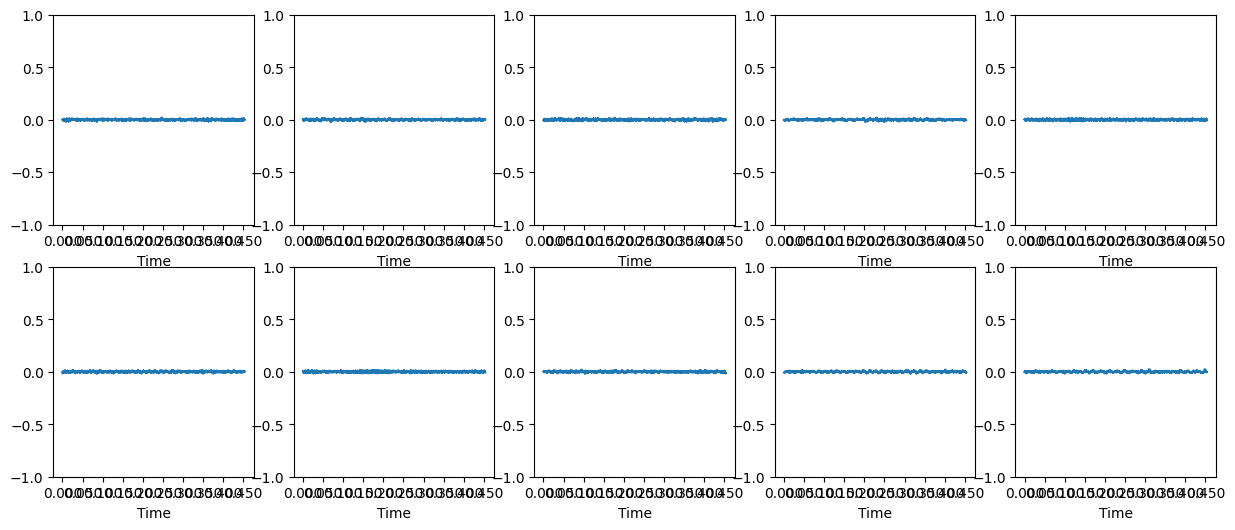

In [28]:
plt.figure(figsize=(15, 6))
for i, x in enumerate(normal_train_signals[:10]):
    plt.subplot(2, 5, i+1)
    librosa.display.waveshow(x[:10000])
    plt.ylim(-1, 1)

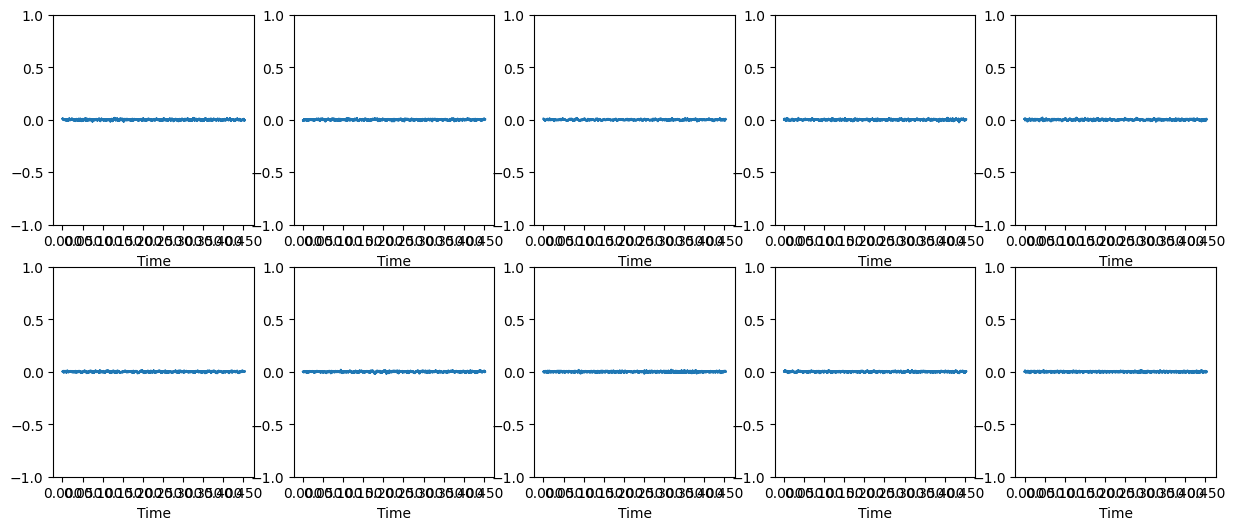

In [29]:
plt.figure(figsize=(15, 6))
for i, x in enumerate(abnormal_train_signals[:10]):
    plt.subplot(2, 5, i+1)
    librosa.display.waveshow(x[:10000])
    plt.ylim(-1, 1)

In [30]:
def extract_features(signal):
    return [
        librosa.feature.zero_crossing_rate(signal)[0, 0],
        librosa.feature.spectral_centroid(y=signal)[0, 0],
    ]

In [31]:
normal_train_features = np.array([extract_features(x) for x in normal_train_signals])
abnormal_train_features = np.array([extract_features(x) for x in abnormal_train_signals])

In [32]:
normal_val_features = np.array([extract_features(x) for x in normal_val_signals])
abnormal_val_features = np.array([extract_features(x) for x in abnormal_val_signals])

In [33]:
print(normal_train_features.shape)
print(abnormal_train_features.shape)
print(normal_val_features.shape)
print(abnormal_val_features.shape)

(489, 2)
(175, 2)
(119, 2)
(47, 2)


In [34]:
print(normal_train_features[10])
print(abnormal_train_features[10])
print(normal_val_features[10])
print(abnormal_val_features[10])

[3.36914062e-02 1.53516277e+03]
[4.34570312e-02 1.52789564e+03]
[6.39648438e-02 1.94236052e+03]
[2.24609375e-02 1.47458235e+03]


Text(0, 0.5, 'Count')

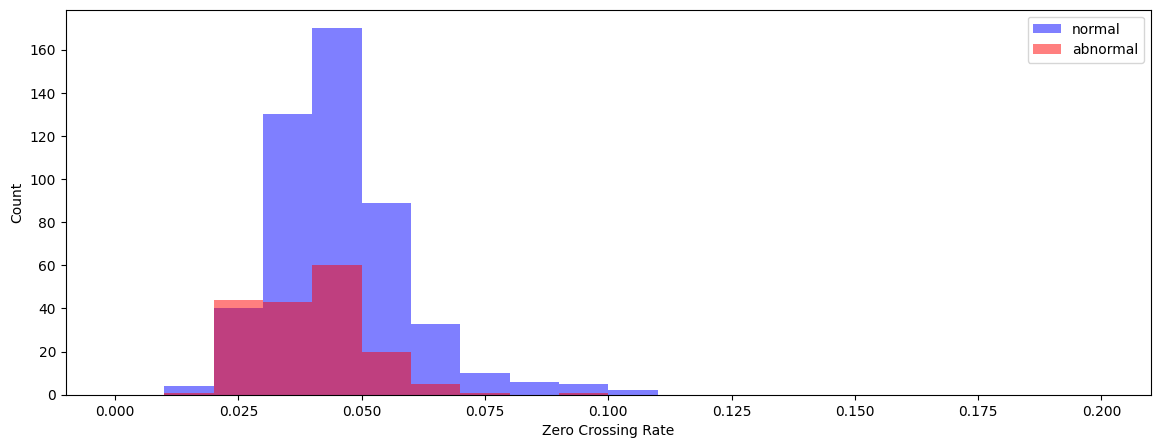

In [35]:
plt.figure(figsize=(14, 5))
plt.hist(normal_train_features[:,0], color='b', range=(0, 0.2), alpha=0.5, bins=20)
plt.hist(abnormal_train_features[:,0], color='r', range=(0, 0.2), alpha=0.5, bins=20)
plt.legend(('normal', 'abnormal'))
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

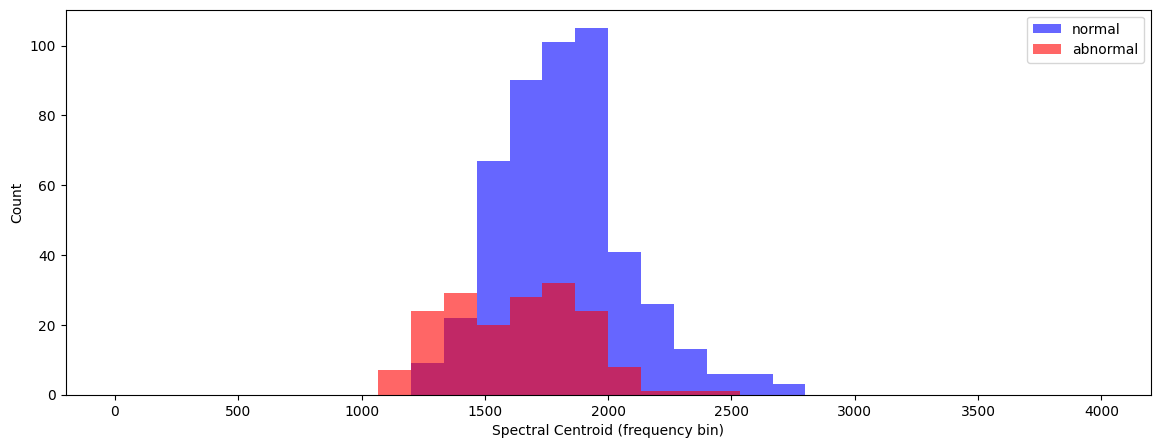

In [36]:
plt.figure(figsize=(14, 5))
plt.hist(normal_train_features[:,1], color='b', range=(0, 4000), bins=30, alpha=0.6)
plt.hist(abnormal_train_features[:,1], color='r', range=(0, 4000), bins=30, alpha=0.6)
plt.legend(('normal', 'abnormal'))
plt.xlabel('Spectral Centroid (frequency bin)')
plt.ylabel('Count')

In [37]:
feature_train_table = np.vstack((normal_train_features, abnormal_train_features))
print(feature_train_table.shape)

(664, 2)


In [38]:
feature_val_table = np.vstack((normal_val_features, abnormal_val_features))
print(feature_val_table.shape)

(166, 2)


In [39]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
training_features = scaler.fit_transform(feature_train_table)
print(training_features.min(axis=0))
print(training_features.max(axis=0))

[-1. -1.]
[1. 1.]


In [40]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
val_features = scaler.fit_transform(feature_val_table)
print(val_features.min(axis=0))
print(val_features.max(axis=0))

[-1. -1.]
[1. 1.]


Text(0, 0.5, 'Spectral Centroid')

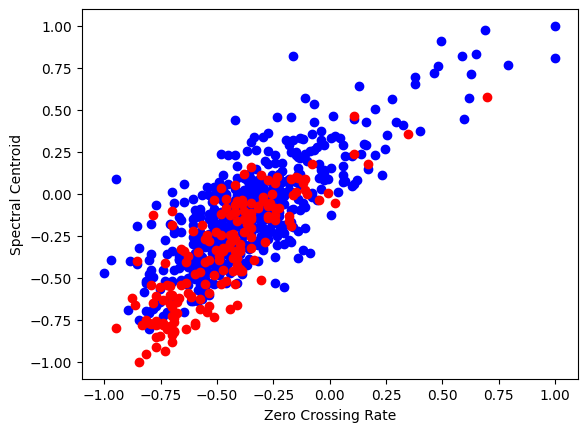

In [41]:
plt.scatter(training_features[:489,0], training_features[:489,1], c='b')
plt.scatter(training_features[489:,0], training_features[489:,1], c='r')
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Spectral Centroid')

In [42]:
y_train_total = [0 for i in range(489)] + [1 for i in range(175)]
y_val_total = [0 for i in range(119)] + [1 for i in range(47)]

In [43]:
y_train_encoded = to_categorical(y_train_total)
y_val_encoded = to_categorical(y_val_total)

In [44]:
y_train_encoded[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [45]:
x_train = training_features
y_train = y_train_encoded
x_val = val_features
y_val = y_val_encoded

In [46]:
x_train.shape, y_train.shape

((664, 2), (664, 2))

In [47]:
x_val.shape, y_val.shape

((166, 2), (166, 2))

In [48]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input

In [49]:
def create_model():
    model = Sequential()
    model.add(Input(shape=(2,)))
    model.add(Dense(8))
    model.add(LeakyReLU(negative_slope=0.1))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))
    return model

In [50]:
model = create_model()
model.summary()
adam_optim = Adam(learning_rate=0.0001)
model.compile(optimizer=adam_optim, loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42 (168.00 B)

 Trainable params: 42 (168.00 B)

 Non-trainable params: 0 (0.00 B)

In [51]:
his = model.fit(
    x_train,
    y_train,
    batch_size=1,
    epochs=100,
    verbose=1,
    validation_data = (x_val, y_val)
)

Epoch 1/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3923 - loss: 0.7366 - val_accuracy: 0.4277 - val_loss: 0.7259
Epoch 2/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5579 - loss: 0.6984 - val_accuracy: 0.5843 - val_loss: 0.6936
Epoch 3/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6191 - loss: 0.6795 - val_accuracy: 0.6627 - val_loss: 0.6691
Epoch 4/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7020 - loss: 0.6454 - val_accuracy: 0.6988 - val_loss: 0.6506
Epoch 5/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7524 - loss: 0.6242 - val_accuracy: 0.7169 - val_loss: 0.6349
Epoch 6/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7091 - loss: 0.6339 - val_accuracy: 0.7169 - val_loss: 0.6231
Epoch 7/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7498 - loss: 0.6156 - val_accuracy: 0.7169 - val_loss: 0.6144
Epoch 8/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7513 - loss: 0.6026 - val_accu

In [52]:
import plotly
import plotly.graph_objs as go

In [53]:
h1 = go.Scatter(y=his.history['loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=his.history['val_loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title='', range=[0, 1]))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [54]:
h1 = go.Scatter(y=his.history['accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=his.history['val_accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title='',range=[0, 1]))
fig2 = go.Figure(data = data, layout=layout1)
fig2.show()

# **CNN Model**

In [55]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D

from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [57]:
file_name = '/content/drive/MyDrive/duf/train/a_00000004_5000.wav'
audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')

print(audio.shape, sample_rate)

mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)

(110250,) 22050
(40, 216)


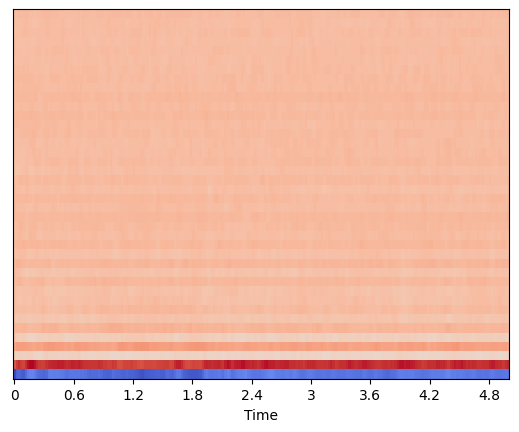

In [58]:
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

In [59]:
max_pad_len = 100

def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    pad_width = max_pad_len - mfccs.shape[1]
    mfccs = np.pad(mfccs, pad_width=((0, 0), (0, max(0, pad_width))), mode='constant')
    return mfccs

In [60]:
normal_train_features = []
for file_name in glob.glob(normal_train):
    data = extract_features(file_name)
    normal_train_features.append(data)

abnormal_train_features = []
for file_name in glob.glob(abnormal_train):
    data = extract_features(file_name)
    abnormal_train_features.append(data)

normal_val_features = []
for file_name in glob.glob(normal_val):
    data = extract_features(file_name)
    normal_val_features.append(data)

abnormal_val_features = []
for file_name in glob.glob(abnormal_val):
    data = extract_features(file_name)
    abnormal_val_features.append(data)

In [61]:
normal_train_features[0].shape

(40, 216)

In [62]:
feature_train_table = np.vstack((normal_train_features, abnormal_train_features))
print(feature_train_table.shape)

(664, 40, 216)


In [63]:
feature_train_table = feature_train_table.reshape(feature_train_table.shape[0], feature_train_table.shape[1], feature_train_table.shape[2], 1)
print(feature_train_table.shape)

(664, 40, 216, 1)


In [64]:
y_train_encoded[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [65]:
feature_val_table = np.vstack((normal_val_features, abnormal_val_features))

In [66]:
feature_val_table = feature_val_table.reshape(feature_val_table.shape[0], feature_val_table.shape[1], feature_val_table.shape[2], 1)
print(feature_val_table.shape)

(166, 40, 216, 1)


In [67]:
x_train = feature_train_table
x_val = feature_val_table
y_train = y_train_encoded
y_val = y_val_encoded

In [68]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((664, 40, 216, 1), (166, 40, 216, 1), (664, 2), (166, 2))

In [69]:
num_rows = 40
num_columns = 216
num_channels = 1
num_batch_size = 64
epochs = 50

In [70]:
model = Sequential()
model.add(Input(shape=(num_rows, num_columns, num_channels)))
model.add(Conv2D(filters=16, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

model.add(Dense(2, activation='softmax'))

In [71]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [72]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [73]:
his = model.fit(x_train, y_train, batch_size=num_batch_size, epochs=epochs, validation_data=(x_val, y_val), verbose=1, callbacks=[checkpoint])

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 886ms/step - accuracy: 0.6358 - loss: 4.5694
Epoch 1: val_loss improved from inf to 1.08710, saving model to best_model.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 970ms/step - accuracy: 0.6369 - loss: 4.4845 - val_accuracy: 0.7169 - val_loss: 1.0871
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - accuracy: 0.6630 - loss: 1.2057
Epoch 2: val_loss improved from 1.08710 to 0.53541, saving model to best_model.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 358ms/step - accuracy: 0.6637 - loss: 1.1997 - val_accuracy: 0.7410 - val_loss: 0.5354
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step - accuracy: 0.7050 - loss: 0.6169
Epoch 3: val_loss improved from 0.53541 to 0.44727, saving model to best_model.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 548ms/step - accuracy: 0.7071 - loss: 0.6159 - val_accuracy: 0.7892 - val_loss: 0.4473
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - accuracy: 0.8210 - loss: 0.4529
Epoch 4: val_loss improved from 0.44727 to 0.43256, s

In [74]:
h1 = go.Scatter(y=his.history['loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=his.history['val_loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [75]:
h1 = go.Scatter(y=his.history['accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=his.history['val_accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig2 = go.Figure(data = data, layout=layout1)
fig2.show()

In [76]:
from tensorflow import keras

model = keras.models.load_model("/content/best_model.keras")

In [77]:
train_res = model.evaluate(x_train, y_train, verbose=0, return_dict=True)
val_res   = model.evaluate(x_val,   y_val,   verbose=0, return_dict=True)

acc_key = next(k for k in train_res.keys() if k in
               ('accuracy', 'binary_accuracy', 'categorical_accuracy',
                'sparse_categorical_accuracy'))

print(f"Training  - loss: {train_res['loss']:.4f}, acc: {train_res[acc_key]:.4f}")
print(f"Validation- loss: {val_res['loss']:.4f}, acc: {val_res[acc_key]:.4f}")


Training  - loss: 0.2069, acc: 0.9262
Validation- loss: 0.2275, acc: 0.9096


In [78]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


In [79]:
cm = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[119   0]
 [ 15  32]]


In [80]:
report = classification_report(y_true_classes, y_pred_classes, target_names=['normal', 'abnormal'],digits=4)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

      normal     0.8881    1.0000    0.9407       119
    abnormal     1.0000    0.6809    0.8101        47

    accuracy                         0.9096       166
   macro avg     0.9440    0.8404    0.8754       166
weighted avg     0.9198    0.9096    0.9037       166



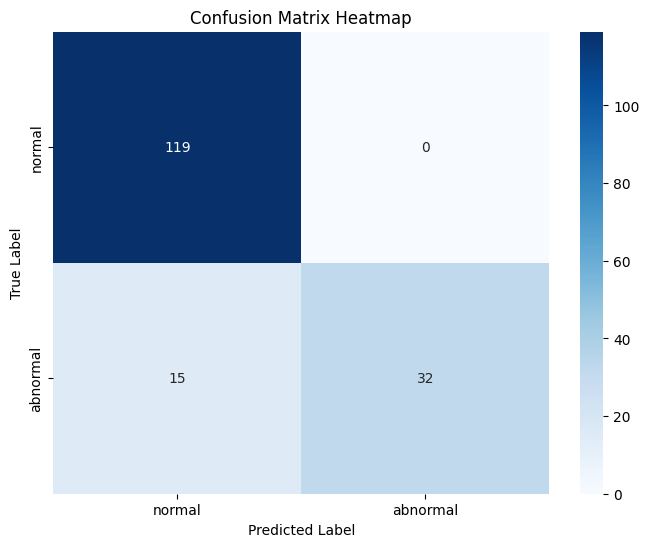

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['normal', 'abnormal'], yticklabels=['normal', 'abnormal'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Task
Explain the error in the selected code, fix it, and incorporate the changes into the existing code.

## Unzip files

### Subtask:
Extract the contents of the zip files in the `data_path` directory.


**Reasoning**:
Extract the contents of the zip files in the `data_path` directory.



In [83]:
import zipfile

for filename in filelist:
    zip_path = os.path.join(data_path, filename)
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(data_path)

## Update data paths

### Subtask:
Update the `train_data`, `val_data`, and `test_data` variables to point to the extracted directories.


**Reasoning**:
Update the train_data, val_data, and test_data variables to point to the extracted directories.



In [84]:
train_data = os.path.join(data_path, "train")
val_data = os.path.join(data_path, "val")
test_data = os.path.join(data_path, "test")

**Reasoning**:
Verify that the directories exist by listing their contents.



In [85]:
print(os.listdir(train_data))
print(os.listdir(val_data))
print(os.listdir(test_data))

['a_00000116_5000.wav', 'a_00000119_0.wav', 'a_00000136_5000.wav', 'a_00000121_0.wav', 'a_00000135_0.wav', 'a_00000121_5000.wav', 'a_00000113_5000.wav', 'a_00000118_0.wav', 'a_00000123_0.wav', 'a_00000128_0.wav', 'a_00000122_0.wav', 'a_00000117_0.wav', 'a_00000134_0.wav', 'a_00000118_5000.wav', 'a_00000110_0.wav', 'a_00000110_5000.wav', 'a_00000119_5000.wav', 'a_00000127_0.wav', 'a_00000120_5000.wav', 'a_00000134_5000.wav', 'a_00000127_5000.wav', 'a_00000130_0.wav', 'a_00000132_5000.wav', 'a_00000137_5000.wav', 'a_00000131_5000.wav', 'a_00000131_0.wav', 'a_00000126_0.wav', 'a_00000133_5000.wav', 'a_00000136_0.wav', 'a_00000109_0.wav', 'a_00000115_0.wav', 'a_00000113_0.wav', 'a_00000128_5000.wav', 'a_00000106_0.wav', 'a_00000114_5000.wav', 'a_00000111_5000.wav', 'a_00000109_5000.wav', 'a_00000111_0.wav', 'a_00000129_0.wav', 'a_00000112_0.wav', 'a_00000104_0.wav', 'a_00000132_0.wav', 'a_00000103_5000.wav', 'a_00000102_0.wav', 'a_00000108_0.wav', 'a_00000095_0.wav', 'a_00000107_0.wav', 'a

## Summary:

### Data Analysis Key Findings

* The initial code for extracting zip files was found to be correct and functional, requiring no error fixing.
* The process successfully extracted the contents of the zip files to the specified `data_path` directory.
* The `train_data`, `val_data`, and `test_data` variables were successfully updated to point to the correct subdirectories within the extracted data.
* Listing the contents of these updated directories confirmed that they contain numerous \`.wav\` files, indicating that the data was loaded and the variables were assigned correctly.

### Insights or Next Steps

* The data is now prepared and accessible in the specified `train`, `val`, and `test` directories for further analysis or model training.
* The next step would likely involve loading and processing the \`.wav\` files for the intended task.
